In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, r2_score
import joblib, scipy
from imblearn.over_sampling import SMOTE
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor

Loading the Stellar Classification Data


In [43]:
df = pd.read_csv('/content/star_classification.csv')

In [44]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [45]:
df.shape

(100000, 18)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [47]:
df.isnull().sum() #no null values found

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [48]:
#describe the data
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


There are no duplicate data

In [49]:
df[df.duplicated()]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


**Before Analysis Dropping the irrelevant columns**

---
 run_ID, rerun_ID, plate, and fiber_ID


In [50]:
new_df = df.drop(['run_ID', 'rerun_ID', 'plate', 'fiber_ID'], axis=1)


In [51]:
new_df = new_df.drop(['cam_col', 'field_ID', 'MJD', 'spec_obj_ID'], axis=1)

In [52]:
new_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   obj_ID    100000 non-null  float64
 1   alpha     100000 non-null  float64
 2   delta     100000 non-null  float64
 3   u         100000 non-null  float64
 4   g         100000 non-null  float64
 5   r         100000 non-null  float64
 6   i         100000 non-null  float64
 7   z         100000 non-null  float64
 8   class     100000 non-null  object 
 9   redshift  100000 non-null  float64
dtypes: float64(9), object(1)
memory usage: 7.6+ MB


In [54]:
new_df['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


Color Magnitude Analysis

In [55]:
new_df['u-g'] = new_df['u'] - new_df['g']
new_df['g-r'] = new_df['g'] - new_df['r']
new_df['r-i'] = new_df['r'] - new_df['i']
new_df['i-z'] = new_df['i'] - new_df['z']

<Axes: xlabel='u-g', ylabel='g-r'>

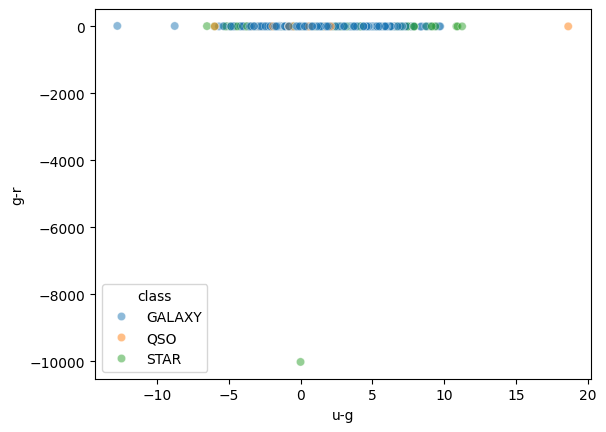

In [56]:
sns.scatterplot(data=new_df, x='u-g', y='g-r', hue='class', alpha=0.5)

Red-Shift distribution

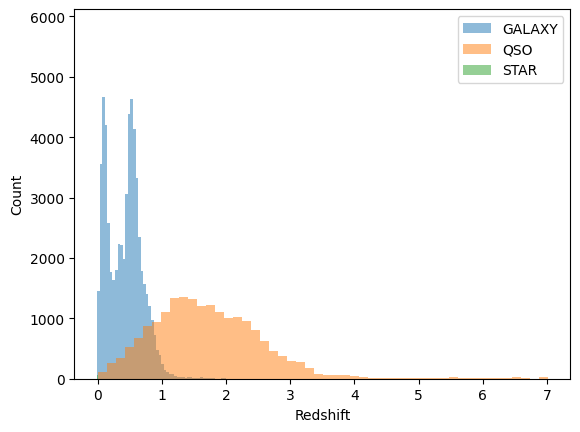

In [57]:
for cls in new_df['class'].unique():
    subset = new_df[new_df['class'] == cls]
    plt.hist(subset['redshift'], bins=50, alpha=0.5, label=cls)
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.legend()
plt.show()

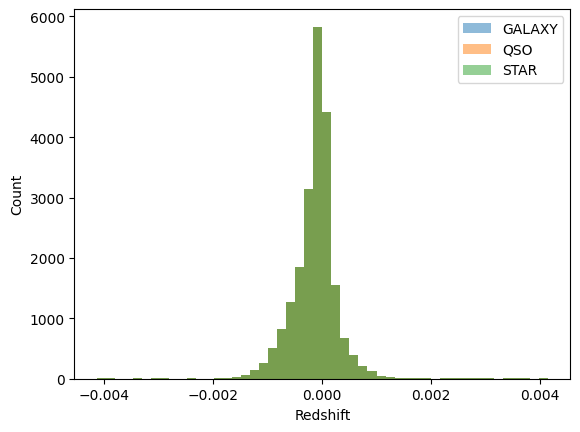

In [58]:
for cls in new_df['class'].unique():
    subset = new_df[new_df['class'] == 'STAR']
    plt.hist(subset['redshift'], bins=50, alpha=0.5, label=cls)
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.legend()
plt.show()

Spatial Distribution

<Axes: xlabel='alpha', ylabel='delta'>

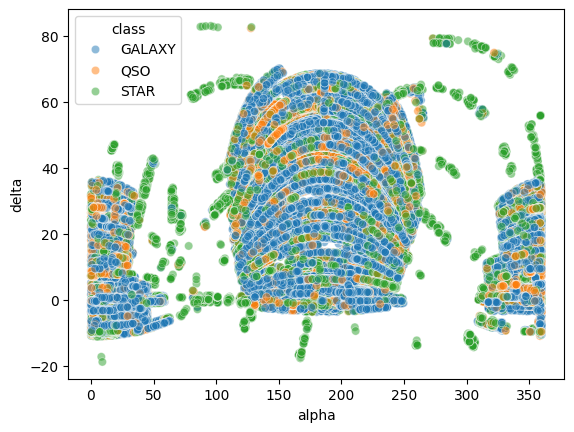

In [59]:
sns.scatterplot(data=new_df, x='alpha', y='delta', hue='class', alpha=0.5)

In [ ]:
# coverage from the northern hemisphere
#The Sloan Foundation 2.5m Telescope at Apache Point Observatory

Potential compact Binary Candidate:


---


*   low u-g & g-r values
*   low redshift



In [60]:
compact_candidates = new_df[
    (new_df['class'] == 'STAR')&
    (new_df['u-g'] < 1.0) &
    (new_df['g-r'] < 0.8)
]

In [61]:
compact_candidates.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,u-g,g-r,r-i,i-z
38,1.237661e+18,136.418378,36.152679,20.66654,22.21825,24.80260,21.43702,22.82647,STAR,0.000308,-1.55171,-2.58435,3.36558,-1.38945
162,1.237650e+18,167.697020,-2.448301,22.45479,21.62992,21.44386,21.35073,20.83829,STAR,0.000461,0.82487,0.18606,0.09313,0.51244
191,1.237666e+18,242.710101,17.836997,20.23238,19.24946,19.04356,18.94587,18.91817,STAR,-0.000276,0.98292,0.20590,0.09769,0.02770
192,1.237666e+18,241.056947,18.482236,20.32845,19.42450,19.06592,18.87761,18.87157,STAR,0.000165,0.90395,0.35858,0.18831,0.00604
239,1.237662e+18,210.841126,7.310204,21.84786,20.95987,20.85843,20.83487,20.43761,STAR,0.000039,0.88799,0.10144,0.02356,0.39726


In [62]:
compact_candidates.shape

(5056, 14)

In [63]:
compact_candidates = compact_candidates[
    (compact_candidates['redshift'] > 0.001) &
    (compact_candidates['redshift'] < 0.02)
]

In [64]:
compact_candidates.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,u-g,g-r,r-i,i-z
2061,1.237664e+18,123.172312,56.900360,21.82299,21.49464,21.13083,20.89578,21.23725,STAR,0.001515,0.32835,0.36381,0.23505,-0.34147
2285,1.237679e+18,35.872868,1.048512,22.76699,21.94616,21.61702,21.63319,21.89210,STAR,0.003566,0.82083,0.32914,-0.01617,-0.25891
2817,1.237651e+18,177.144811,-1.964056,21.82347,21.49567,21.42779,21.44053,22.30855,STAR,0.002254,0.32780,0.06788,-0.01274,-0.86802
3681,1.237662e+18,228.375907,10.237681,22.53633,21.65808,21.67136,21.78228,21.50387,STAR,0.001636,0.87825,-0.01328,-0.11092,0.27841
4209,1.237667e+18,159.961860,26.397767,19.78844,18.93928,18.58451,18.45142,18.38371,STAR,0.001117,0.84916,0.35477,0.13309,0.06771


In [65]:
compact_candidates.shape

(126, 14)

In [69]:
star_df = new_df[new_df['class'] == 'STAR']

Color-Color Diagram for Compact binaries Candidates

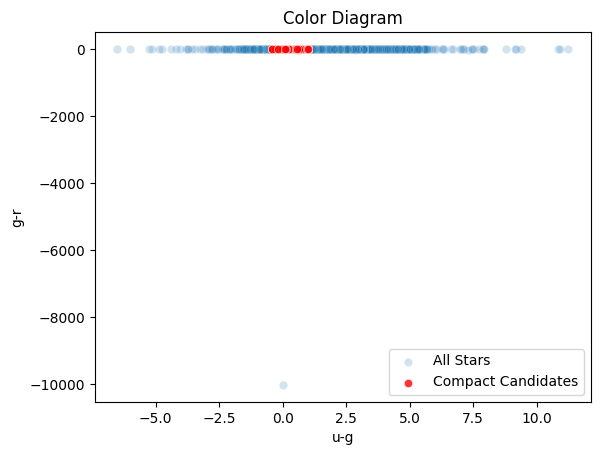

In [70]:
compact_candidates['u-g'] = compact_candidates['u'] - compact_candidates['g']
compact_candidates['g-r'] = compact_candidates['g'] - compact_candidates['r']

sns.scatterplot(data=star_df, x='u-g', y='g-r', label='All Stars', alpha=0.2)
sns.scatterplot(data=compact_candidates, x='u-g', y='g-r', label='Compact Candidates', color='red', alpha=0.8)
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.legend()
plt.title('Color Diagram')
plt.show()

Redshift analysis for compact binaries candidates

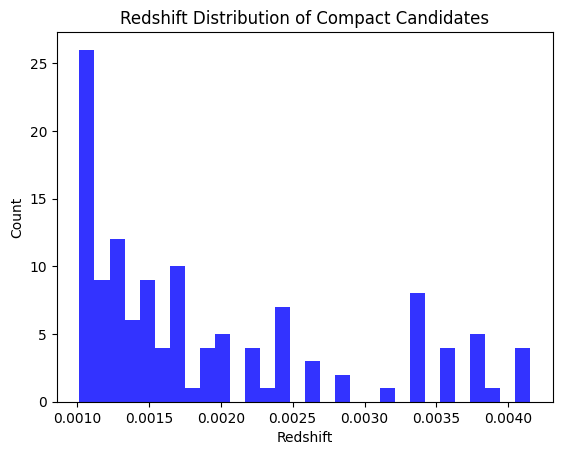

In [72]:
plt.hist(compact_candidates['redshift'], bins=30, alpha=0.8, color='blue')
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.title('Redshift Distribution of Compact Candidates')
plt.show()

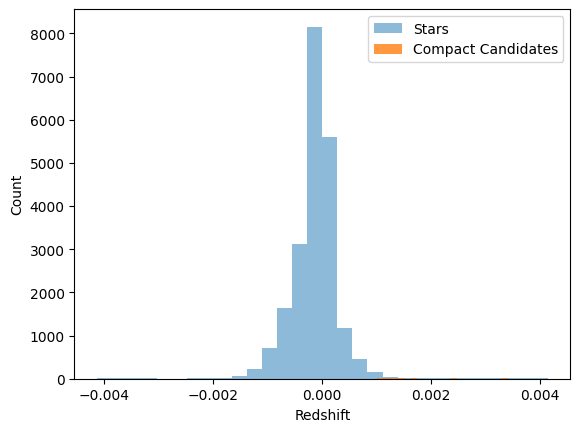

In [73]:
plt.hist(star_df['redshift'], bins=30, alpha=0.5, label='Stars')
plt.hist(compact_candidates['redshift'], bins=30, alpha=0.8, label='Compact Candidates')
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.legend()
plt.show()

Spatial Clustering of Potential Candidates

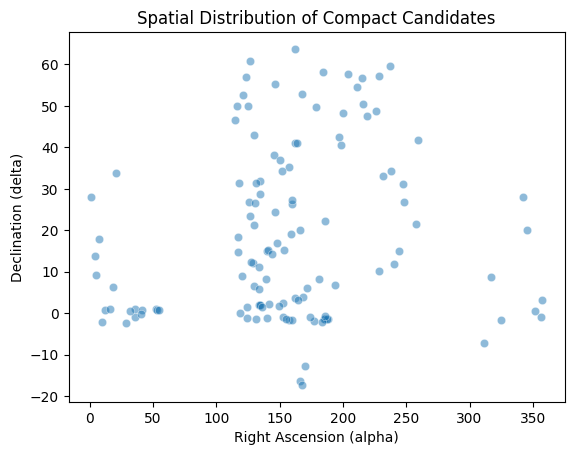

In [74]:
sns.scatterplot(data=compact_candidates, x='alpha', y='delta', alpha=0.5)
plt.xlabel('Right Ascension (alpha)')
plt.ylabel('Declination (delta)')
plt.title('Spatial Distribution of Compact Candidates')
plt.show()

Spectral Analysis is very important for classifying the potential camdidate,
as of now i don't have that data and expertise but it's a very good and significant topic for further research and i would like to build upon it

Simple classification Model to predict STAR, GALAXY AND QUASAR

In [66]:
X = new_df[['u', 'g', 'r', 'i', 'z', 'redshift']]
y = new_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     17845
         QSO       0.96      0.92      0.94      5700
        STAR       1.00      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000

